In [1]:
import nsfg
import thinkstats2
import thinkplot
%matplotlib inline

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [3]:
hist = thinkstats2.Hist(live.pregordr)

In [4]:
n = hist.Total()
from collections import defaultdict
d = defaultdict(float)
for x, freq in hist.Items():
    d[x] = freq / n
    print(f"Type: {type(d[x])} val: {x}, pmf: {d[x]}")
# print(d[122], type(d[122]))

Type: <class 'float'> val: 1, pmf: 0.36816790555312634
Type: <class 'float'> val: 2, pmf: 0.2940533449934412
Type: <class 'float'> val: 3, pmf: 0.17479230432881504
Type: <class 'float'> val: 4, pmf: 0.08635767380848274
Type: <class 'float'> val: 5, pmf: 0.04121119370354176
Type: <class 'float'> val: 6, pmf: 0.019457804984696108
Type: <class 'float'> val: 7, pmf: 0.00819851333624836
Type: <class 'float'> val: 8, pmf: 0.004153913423699169
Type: <class 'float'> val: 9, pmf: 0.0020769567118495845
Type: <class 'float'> val: 10, pmf: 0.0006558810668998689
Type: <class 'float'> val: 11, pmf: 0.0005465675557498906
Type: <class 'float'> val: 12, pmf: 0.00021862702229995628
Type: <class 'float'> val: 17, pmf: 0.00010931351114997814


In [5]:
pmf = thinkstats2.Pmf(live.pregordr)
total = 0
for x, pm in pmf.Items():
    print(f"val: {x} pmf: {pm}")
    total += pm
print(f"Total: {total}")

val: 1 pmf: 0.3681679055531264
val: 2 pmf: 0.2940533449934412
val: 3 pmf: 0.17479230432881504
val: 4 pmf: 0.08635767380848274
val: 5 pmf: 0.04121119370354176
val: 6 pmf: 0.019457804984696108
val: 7 pmf: 0.00819851333624836
val: 8 pmf: 0.004153913423699169
val: 9 pmf: 0.0020769567118495845
val: 10 pmf: 0.0006558810668998689
val: 11 pmf: 0.0005465675557498907
val: 12 pmf: 0.00021862702229995628
val: 17 pmf: 0.00010931351114997814
Total: 1.0


In [6]:
total = 0
for x, pm in pmf.Items():
    print(f"val: {x} pmf: {pm}")
    total += pm
print(f"Total: {total}")

val: 1 pmf: 0.3681679055531264
val: 2 pmf: 0.2940533449934412
val: 3 pmf: 0.17479230432881504
val: 4 pmf: 0.08635767380848274
val: 5 pmf: 0.04121119370354176
val: 6 pmf: 0.019457804984696108
val: 7 pmf: 0.00819851333624836
val: 8 pmf: 0.004153913423699169
val: 9 pmf: 0.0020769567118495845
val: 10 pmf: 0.0006558810668998689
val: 11 pmf: 0.0005465675557498907
val: 12 pmf: 0.00021862702229995628
val: 17 pmf: 0.00010931351114997814
Total: 1.0


In [7]:
pmf.Total()
pmf.Normalize()
pmf.Total()

1.0

In [8]:
pmf.Incr(3, 0.2)
pmf[3]

0.37479230432881505

In [9]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
other_pmf = thinkstats2.Pmf(others.prglngth, label='other')

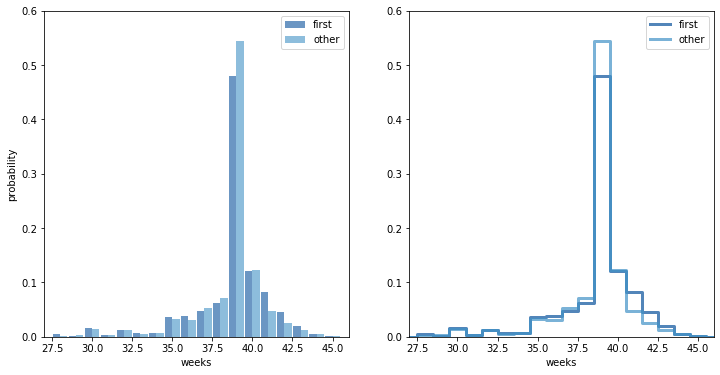

<Figure size 576x432 with 0 Axes>

In [10]:
width = .45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='probability', axis=[27, 46, 0, 0.6])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.show(xlabel='weeks', axis=[27, 46, 0, 0.6])

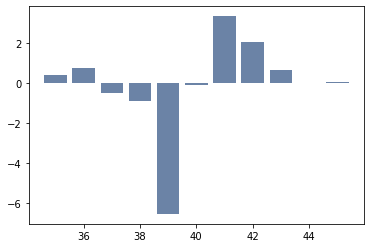

In [11]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
thinkplot.Bar(weeks, diffs)

In [20]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')
pmf.Mean()

23.692307692307693

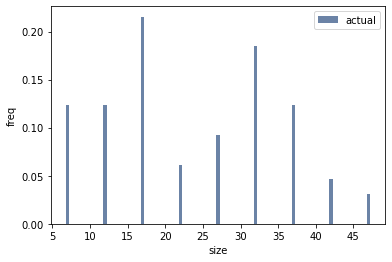

In [17]:
# width = .45
thinkplot.Hist(pmf, width=width)
thinkplot.Config(xlabel='size', ylabel='freq')


In [22]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
    new_pmf.Normalize()
    return new_pmf

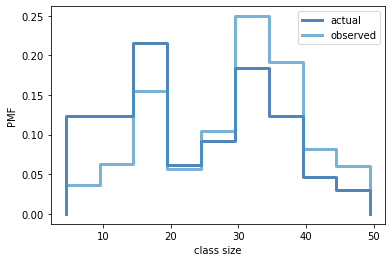

29.123376623376625

<Figure size 576x432 with 0 Axes>

In [21]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')
biased_pmf.Mean()

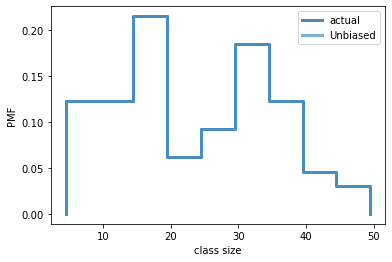

23.69230769230769

<Figure size 576x432 with 0 Axes>

In [23]:
unbiased_pmf = UnbiasPmf(biased_pmf, 'Unbiased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')
unbiased_pmf.Mean()

In [22]:
import numpy as np
import pandas
array = np.random.randn(4,2)
columns = ['A', 'B']
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.723368,-0.917666
b,0.030576,-1.689293
c,-0.681757,-0.190747
d,0.762045,-0.132276


In [33]:
indices = ['a', 'c']
type(df.iloc[1])

pandas.core.series.Series

In [16]:
type(array)

numpy.ndarray